In [1]:
import sys

In [2]:
sys.path[0] = ('/home/labs/waic/omrik/DNN-Challenge')

In [3]:
from fastai.tabular import *
from datasets import GlucoseData
from models import Linear
from wis_dnn_challenge import Predictor

In [4]:
root = Path('../data').resolve()
train = root / 'train'
val = root / 'val'

In [5]:
predictor = Predictor(train)
predictor.load_raw_data()
X, y = predictor.build_features(X_glucose=predictor.train_glucose, X_meals=predictor.train_meals, build_y=True)

/home/labs/waic/omrik/DNN-Challenge/wis_dnn_challenge.py:215: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  X = X.loc[y.index].dropna(how='any', axis=0)


In [6]:
glucose_val = Predictor.load_data_frame(os.path.join(val, 'GlucoseValues.csv'))
meals_val = Predictor.load_data_frame(os.path.join(val, 'Meals.csv'))
X_val, y_val = predictor.build_features(X_glucose=glucose_val, X_meals=meals_val, build_y=True)

In [15]:
ds_kwargs = {'resample_rule': 60}
train_ds = GlucoseData(*X, y, **ds_kwargs)
val_ds = GlucoseData(*X_val, y_val, **ds_kwargs)
data = DataBunch.create(train_ds, val_ds, bs=512, num_workers=8)
data

DataBunch;

Train: <datasets.glucose_meals.GlucoseData object at 0x7fcf8361b080>;

Valid: <datasets.glucose_meals.GlucoseData object at 0x7fcf8361b0b8>;

Test: None

In [10]:
predictor.norm_stats['GlucoseValue']

(93.19270255474244, 19.765448764171357)

In [16]:
model = Linear()

In [17]:
learner = Learner(data, model, loss_func=nn.MSELoss())

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 7.59E-02


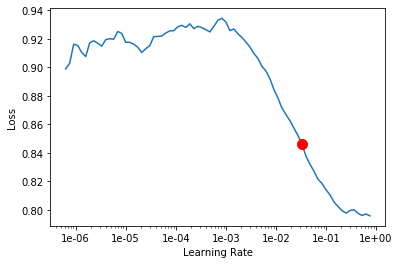

In [18]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
learner.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,time


In [7]:
cgm = X[0]
cgm_val = X_val[0]

In [8]:
cgm.head()

GlucoseValue  GlucoseValue -15min  \
id id Date                                                     
46 46 2015-01-05 22:18:00      5.464080             5.099808   
      2015-01-05 22:33:00      5.828352             5.464080   
      2015-01-05 22:48:00      6.101556             5.828352   
      2015-01-05 23:03:00      6.101556             6.101556   
      2015-01-05 23:18:00      6.283692             6.101556   

                           GlucoseValue -30min  GlucoseValue -45min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             5.281944             5.828352   
      2015-01-05 22:33:00             5.099808             5.281944   
      2015-01-05 22:48:00             5.464080             5.099808   
      2015-01-05 23:03:00             5.828352             5.464080   
      2015-01-05 23:18:00             6.101556             5.828352   

                           GlucoseValue -60min  GlucoseValue -75min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             6.192624             6.465828   
      2015-01-05 22:33:00             5.828352             6.192624   
      2015-01-05 22:48:00             5.281944             5.828352   
      2015-01-05 23:03:00             5.099808             5.281944   
      2015-01-05 23:18:00             5.464080             5.099808   

                           GlucoseValue -90min  GlucoseValue -105min  \
id id Date                                                             
46 46 2015-01-05 22:18:00             6.192624              5.646216   
      2015-01-05 22:33:00             6.465828              6.192624   
      2015-01-05 22:48:00             6.192624              6.465828   
      2015-01-05 23:03:00             5.828352              6.192624   
      2015-01-05 23:18:00             5.281944              5.828352   

                           GlucoseValue -120min  GlucoseValue -135min  ...  \
id id Date                                                             ...   
46 46 2015-01-05 22:18:00              5.555148              5.828352  ...   
      2015-01-05 22:33:00              5.646216              5.555148  ...   
      2015-01-05 22:48:00              6.192624              5.646216  ...   
      2015-01-05 23:03:00              6.465828              6.192624  ...   
      2015-01-05 23:18:00              6.192624              6.465828  ...   

                           GlucoseValue -600min  GlucoseValue -615min  \
id id Date                                                              
46 46 2015-01-05 22:18:00              6.647964              5.646216   
      2015-01-05 22:33:00              9.744277              6.647964   
      2015-01-05 22:48:00             11.656705              9.744277   
      2015-01-05 23:03:00             11.929909             11.656705   
      2015-01-05 23:18:00             11.292433             11.929909   

                           GlucoseValue -630min  GlucoseValue -645min  \
id id Date                                                              
46 46 2015-01-05 22:18:00              6.010488              6.283692   
      2015-01-05 22:33:00              5.646216              6.010488   
      2015-01-05 22:48:00              6.647964              5.646216   
      2015-01-05 23:03:00              9.744277              6.647964   
      2015-01-05 23:18:00             11.656705              9.744277   

                           GlucoseValue -660min  GlucoseValue -675min  \
id id Date                                                              
46 46 2015-01-05 22:18:00              6.192624              6.010488   
      2015-01-05 22:33:00              6.283692              6.192624   
      2015-01-05 22:48:00              6.010488              6.283692   
      2015-01-05 23:03:00              5.646216              6.010488   
      2015-01-05 23:18:00              6.647964              5.64621

In [9]:
y.head()

Glucose difference +15min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.364272   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.000000   
      2015-01-05 23:03:00                   0.182136   
      2015-01-05 23:18:00                   0.364272   

                           Glucose difference +30min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.182136   
      2015-01-05 23:03:00                   0.546408   
      2015-01-05 23:18:00                   0.091068   

                           Glucose difference +45min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.455340   
      2015-01-05 22:48:00                   0.546408   
      2015-01-05 23:03:00                   0.273204   
      2015-01-05 23:18:00                  -0.455340   

                           Glucose difference +60min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.819612   
      2015-01-05 22:33:00                   0.819612   
      2015-01-05 22:48:00                   0.273204   
      2015-01-05 23:03:00                  -0.273204   
      2015-01-05 23:18:00                  -0.455340   

                           Glucose difference +75min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   1.183884   
      2015-01-05 22:33:00                   0.546408   
      2015-01-05 22:48:00                  -0.273204   
      2015-01-05 23:03:00                  -0.273204   
      2015-01-05 23:18:00                  -0.273204   

                           Glucose difference +90min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.910680   
      2015-01-05 22:33:00                   0.000000   
      2015-01-05 22:48:00                  -0.273204   
      2015-01-05 23:03:00                  -0.091068   
      2015-01-05 23:18:00                  -0.364272   

                           Glucose difference +105min  \
id id Date                                              
46 46 2015-01-05 22:18:00                    0.364272   
      2015-01-05 22:33:00                    0.000000   
      2015-01-05 22:48:00                   -0.091068   
      2015-01-05 23:03:00                   -0.182136   
      2015-01-05 23:18:00                   -0.364272   

                           Glucose difference +120min  
id id Date                                             
46 46 2015-01-05 22:18:00                    0.364272  
      2015-01-05 22:33:00                    0.182136  
      2015-01-05 22:48:00                   -0.182136  
      2015-01-05 23:03:00                   -0.182136  
      2015-01-05 23:18:00                   -0.273204

In [10]:
dep = y.columns
dep

Index(['Glucose difference +15min', 'Glucose difference +30min',
       'Glucose difference +45min', 'Glucose difference +60min',
       'Glucose difference +75min', 'Glucose difference +90min',
       'Glucose difference +105min', 'Glucose difference +120min'],
      dtype='object')

In [11]:
split_idx = range(len(cgm), len(cgm) + len(cgm_val))
split_idx

range(646683, 811805)

In [12]:
df_train = pd.concat((cgm, y), axis=1)
df_train.head()

GlucoseValue  GlucoseValue -15min  \
id id Date                                                     
46 46 2015-01-05 22:18:00      5.464080             5.099808   
      2015-01-05 22:33:00      5.828352             5.464080   
      2015-01-05 22:48:00      6.101556             5.828352   
      2015-01-05 23:03:00      6.101556             6.101556   
      2015-01-05 23:18:00      6.283692             6.101556   

                           GlucoseValue -30min  GlucoseValue -45min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             5.281944             5.828352   
      2015-01-05 22:33:00             5.099808             5.281944   
      2015-01-05 22:48:00             5.464080             5.099808   
      2015-01-05 23:03:00             5.828352             5.464080   
      2015-01-05 23:18:00             6.101556             5.828352   

                           GlucoseValue -60min  GlucoseValue -75min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             6.192624             6.465828   
      2015-01-05 22:33:00             5.828352             6.192624   
      2015-01-05 22:48:00             5.281944             5.828352   
      2015-01-05 23:03:00             5.099808             5.281944   
      2015-01-05 23:18:00             5.464080             5.099808   

                           GlucoseValue -90min  GlucoseValue -105min  \
id id Date                                                             
46 46 2015-01-05 22:18:00             6.192624              5.646216   
      2015-01-05 22:33:00             6.465828              6.192624   
      2015-01-05 22:48:00             6.192624              6.465828   
      2015-01-05 23:03:00             5.828352              6.192624   
      2015-01-05 23:18:00             5.281944              5.828352   

                           GlucoseValue -120min  GlucoseValue -135min  ...  \
id id Date                                                             ...   
46 46 2015-01-05 22:18:00              5.555148              5.828352  ...   
      2015-01-05 22:33:00              5.646216              5.555148  ...   
      2015-01-05 22:48:00              6.192624              5.646216  ...   
      2015-01-05 23:03:00              6.465828              6.192624  ...   
      2015-01-05 23:18:00              6.192624              6.465828  ...   

                           GlucoseValue -720min      time  \
id id Date                                                  
46 46 2015-01-05 22:18:00              6.647964  0.929167   
      2015-01-05 22:33:00              6.465828  0.939583   
      2015-01-05 22:48:00              6.101556  0.950000   
      2015-01-05 23:03:00              6.010488  0.960417   
      2015-01-05 23:18:00              6.192624  0.970833   

                           Glucose difference +15min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.364272   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.000000   
      2015-01-05 23:03:00                   0.182136   
      2015-01-05 23:18:00                   0.364272   

                           Glucose difference +30min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.182136   
      2015-01-05 23:03:00                   0.546408   
      2015-01-05 23:18:00                   0.091068   

                           Glucose difference +45min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.455340   
      2015-01-05 22:48:00                   0.546408   
      2015-01-05 23:03:00           

In [13]:
df_val = pd.concat((cgm_val, y_val), axis=1)
df_val.head()

GlucoseValue  GlucoseValue -15min  \
id id Date                                                     
66 66 2015-01-02 22:24:00      4.553400             4.644468   
      2015-01-02 22:39:00      4.462332             4.553400   
      2015-01-02 22:54:00      4.462332             4.462332   
      2015-01-02 23:09:00      4.462332             4.462332   
      2015-01-02 23:24:00      4.735536             4.462332   

                           GlucoseValue -30min  GlucoseValue -45min  \
id id Date                                                            
66 66 2015-01-02 22:24:00             4.644468             4.644468   
      2015-01-02 22:39:00             4.644468             4.644468   
      2015-01-02 22:54:00             4.553400             4.644468   
      2015-01-02 23:09:00             4.462332             4.553400   
      2015-01-02 23:24:00             4.462332             4.462332   

                           GlucoseValue -60min  GlucoseValue -75min  \
id id Date                                                            
66 66 2015-01-02 22:24:00             4.644468             4.826604   
      2015-01-02 22:39:00             4.644468             4.644468   
      2015-01-02 22:54:00             4.644468             4.644468   
      2015-01-02 23:09:00             4.644468             4.644468   
      2015-01-02 23:24:00             4.553400             4.644468   

                           GlucoseValue -90min  GlucoseValue -105min  \
id id Date                                                             
66 66 2015-01-02 22:24:00             5.008740              5.190876   
      2015-01-02 22:39:00             4.826604              5.008740   
      2015-01-02 22:54:00             4.644468              4.826604   
      2015-01-02 23:09:00             4.644468              4.644468   
      2015-01-02 23:24:00             4.644468              4.644468   

                           GlucoseValue -120min  GlucoseValue -135min  ...  \
id id Date                                                             ...   
66 66 2015-01-02 22:24:00              5.373012              5.555148  ...   
      2015-01-02 22:39:00              5.190876              5.373012  ...   
      2015-01-02 22:54:00              5.008740              5.190876  ...   
      2015-01-02 23:09:00              4.826604              5.008740  ...   
      2015-01-02 23:24:00              4.644468              4.826604  ...   

                           GlucoseValue -720min      time  \
id id Date                                                  
66 66 2015-01-02 22:24:00              3.733788  0.933333   
      2015-01-02 22:39:00              4.006992  0.943750   
      2015-01-02 22:54:00              4.280196  0.954167   
      2015-01-02 23:09:00              4.462332  0.964583   
      2015-01-02 23:24:00              4.371264  0.975000   

                           Glucose difference +15min  \
id id Date                                             
66 66 2015-01-02 22:24:00                  -0.091068   
      2015-01-02 22:39:00                   0.000000   
      2015-01-02 22:54:00                   0.000000   
      2015-01-02 23:09:00                   0.273204   
      2015-01-02 23:24:00                   0.182136   

                           Glucose difference +30min  \
id id Date                                             
66 66 2015-01-02 22:24:00                  -0.091068   
      2015-01-02 22:39:00                   0.000000   
      2015-01-02 22:54:00                   0.273204   
      2015-01-02 23:09:00                   0.455340   
      2015-01-02 23:24:00                   0.182136   

                           Glucose difference +45min  \
id id Date                                             
66 66 2015-01-02 22:24:00                  -0.091068   
      2015-01-02 22:39:00                   0.273204   
      2015-01-02 22:54:00                   0.455340   
      2015-01-02 23:09:00           

In [14]:
df = pd.concat((df_train, df_val))
df.head()

GlucoseValue  GlucoseValue -15min  \
id id Date                                                     
46 46 2015-01-05 22:18:00      5.464080             5.099808   
      2015-01-05 22:33:00      5.828352             5.464080   
      2015-01-05 22:48:00      6.101556             5.828352   
      2015-01-05 23:03:00      6.101556             6.101556   
      2015-01-05 23:18:00      6.283692             6.101556   

                           GlucoseValue -30min  GlucoseValue -45min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             5.281944             5.828352   
      2015-01-05 22:33:00             5.099808             5.281944   
      2015-01-05 22:48:00             5.464080             5.099808   
      2015-01-05 23:03:00             5.828352             5.464080   
      2015-01-05 23:18:00             6.101556             5.828352   

                           GlucoseValue -60min  GlucoseValue -75min  \
id id Date                                                            
46 46 2015-01-05 22:18:00             6.192624             6.465828   
      2015-01-05 22:33:00             5.828352             6.192624   
      2015-01-05 22:48:00             5.281944             5.828352   
      2015-01-05 23:03:00             5.099808             5.281944   
      2015-01-05 23:18:00             5.464080             5.099808   

                           GlucoseValue -90min  GlucoseValue -105min  \
id id Date                                                             
46 46 2015-01-05 22:18:00             6.192624              5.646216   
      2015-01-05 22:33:00             6.465828              6.192624   
      2015-01-05 22:48:00             6.192624              6.465828   
      2015-01-05 23:03:00             5.828352              6.192624   
      2015-01-05 23:18:00             5.281944              5.828352   

                           GlucoseValue -120min  GlucoseValue -135min  ...  \
id id Date                                                             ...   
46 46 2015-01-05 22:18:00              5.555148              5.828352  ...   
      2015-01-05 22:33:00              5.646216              5.555148  ...   
      2015-01-05 22:48:00              6.192624              5.646216  ...   
      2015-01-05 23:03:00              6.465828              6.192624  ...   
      2015-01-05 23:18:00              6.192624              6.465828  ...   

                           GlucoseValue -720min      time  \
id id Date                                                  
46 46 2015-01-05 22:18:00              6.647964  0.929167   
      2015-01-05 22:33:00              6.465828  0.939583   
      2015-01-05 22:48:00              6.101556  0.950000   
      2015-01-05 23:03:00              6.010488  0.960417   
      2015-01-05 23:18:00              6.192624  0.970833   

                           Glucose difference +15min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.364272   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.000000   
      2015-01-05 23:03:00                   0.182136   
      2015-01-05 23:18:00                   0.364272   

                           Glucose difference +30min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.273204   
      2015-01-05 22:48:00                   0.182136   
      2015-01-05 23:03:00                   0.546408   
      2015-01-05 23:18:00                   0.091068   

                           Glucose difference +45min  \
id id Date                                             
46 46 2015-01-05 22:18:00                   0.637476   
      2015-01-05 22:33:00                   0.455340   
      2015-01-05 22:48:00                   0.546408   
      2015-01-05 23:03:00           

In [15]:
cont_names = cgm.columns
cont_names

Index(['GlucoseValue', 'GlucoseValue -15min', 'GlucoseValue -30min',
       'GlucoseValue -45min', 'GlucoseValue -60min', 'GlucoseValue -75min',
       'GlucoseValue -90min', 'GlucoseValue -105min', 'GlucoseValue -120min',
       'GlucoseValue -135min', 'GlucoseValue -150min', 'GlucoseValue -165min',
       'GlucoseValue -180min', 'GlucoseValue -195min', 'GlucoseValue -210min',
       'GlucoseValue -225min', 'GlucoseValue -240min', 'GlucoseValue -255min',
       'GlucoseValue -270min', 'GlucoseValue -285min', 'GlucoseValue -300min',
       'GlucoseValue -315min', 'GlucoseValue -330min', 'GlucoseValue -345min',
       'GlucoseValue -360min', 'GlucoseValue -375min', 'GlucoseValue -390min',
       'GlucoseValue -405min', 'GlucoseValue -420min', 'GlucoseValue -435min',
       'GlucoseValue -450min', 'GlucoseValue -465min', 'GlucoseValue -480min',
       'GlucoseValue -495min', 'GlucoseValue -510min', 'GlucoseValue -525min',
       'GlucoseValue -540min', 'GlucoseValue -555min', 'GlucoseVal

In [22]:
src = TabularList.from_df(df, cont_names=cont_names).split_by_idx(split_idx).label_from_df(cols=list(dep))
src

LabelLists;

Train: LabelList (646683 items)
x: TabularList
GlucoseValue 5.4641; GlucoseValue -15min 5.0998; GlucoseValue -30min 5.2819; GlucoseValue -45min 5.8284; GlucoseValue -60min 6.1926; GlucoseValue -75min 6.4658; GlucoseValue -90min 6.1926; GlucoseValue -105min 5.6462; GlucoseValue -120min 5.5551; GlucoseValue -135min 5.8284; GlucoseValue -150min 5.9194; GlucoseValue -165min 5.8284; GlucoseValue -180min 5.9194; GlucoseValue -195min 5.7373; GlucoseValue -210min 5.1909; GlucoseValue -225min 5.5551; GlucoseValue -240min 6.4658; GlucoseValue -255min 6.0105; GlucoseValue -270min 5.1909; GlucoseValue -285min 4.8266; GlucoseValue -300min 5.0998; GlucoseValue -315min 6.0105; GlucoseValue -330min 6.3748; GlucoseValue -345min 5.8284; GlucoseValue -360min 6.2837; GlucoseValue -375min 7.4676; GlucoseValue -390min 6.7390; GlucoseValue -405min 5.0998; GlucoseValue -420min 4.6445; GlucoseValue -435min 5.0998; GlucoseValue -450min 5.9194; GlucoseValue -465min 7.1033; GlucoseValue -480min 7.831

In [23]:
data = src.databunch(bs=256)
data

TabularDataBunch;

Train: LabelList (646683 items)
x: TabularList
GlucoseValue 5.4641; GlucoseValue -15min 5.0998; GlucoseValue -30min 5.2819; GlucoseValue -45min 5.8284; GlucoseValue -60min 6.1926; GlucoseValue -75min 6.4658; GlucoseValue -90min 6.1926; GlucoseValue -105min 5.6462; GlucoseValue -120min 5.5551; GlucoseValue -135min 5.8284; GlucoseValue -150min 5.9194; GlucoseValue -165min 5.8284; GlucoseValue -180min 5.9194; GlucoseValue -195min 5.7373; GlucoseValue -210min 5.1909; GlucoseValue -225min 5.5551; GlucoseValue -240min 6.4658; GlucoseValue -255min 6.0105; GlucoseValue -270min 5.1909; GlucoseValue -285min 4.8266; GlucoseValue -300min 5.0998; GlucoseValue -315min 6.0105; GlucoseValue -330min 6.3748; GlucoseValue -345min 5.8284; GlucoseValue -360min 6.2837; GlucoseValue -375min 7.4676; GlucoseValue -390min 6.7390; GlucoseValue -405min 5.0998; GlucoseValue -420min 4.6445; GlucoseValue -435min 5.0998; GlucoseValue -450min 5.9194; GlucoseValue -465min 7.1033; GlucoseValue -480min

In [24]:
layers = [256, 128, 64, 32, 16]
ps = [0.5 for _ in range(len(layers))]
learner = tabular_learner(data, layers, ps, loss_func=nn.MSELoss(), metrics=mean_absolute_error)
learner

Learner(data=TabularDataBunch;

Train: LabelList (646683 items)
x: TabularList
GlucoseValue 5.4641; GlucoseValue -15min 5.0998; GlucoseValue -30min 5.2819; GlucoseValue -45min 5.8284; GlucoseValue -60min 6.1926; GlucoseValue -75min 6.4658; GlucoseValue -90min 6.1926; GlucoseValue -105min 5.6462; GlucoseValue -120min 5.5551; GlucoseValue -135min 5.8284; GlucoseValue -150min 5.9194; GlucoseValue -165min 5.8284; GlucoseValue -180min 5.9194; GlucoseValue -195min 5.7373; GlucoseValue -210min 5.1909; GlucoseValue -225min 5.5551; GlucoseValue -240min 6.4658; GlucoseValue -255min 6.0105; GlucoseValue -270min 5.1909; GlucoseValue -285min 4.8266; GlucoseValue -300min 5.0998; GlucoseValue -315min 6.0105; GlucoseValue -330min 6.3748; GlucoseValue -345min 5.8284; GlucoseValue -360min 6.2837; GlucoseValue -375min 7.4676; GlucoseValue -390min 6.7390; GlucoseValue -405min 5.0998; GlucoseValue -420min 4.6445; GlucoseValue -435min 5.0998; GlucoseValue -450min 5.9194; GlucoseValue -465min 7.1033; Glucose

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 6.31E-02


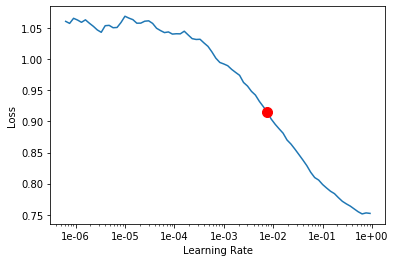

In [59]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [26]:
learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.420975,0.418046,0.440386,00:31
1,0.430537,0.419683,0.443897,00:31
2,0.414146,0.420015,0.438491,00:31
3,0.417076,0.420375,0.443237,00:32
4,0.411120,0.420678,0.441963,00:32
5,0.420033,0.420029,0.441883,00:31
6,0.413608,0.421737,0.440902,00:32
7,0.414820,0.423347,0.443743,00:32
8,0.421330,0.427180,0.442430,00:32
9,0.421556,0.426563,0.443444,00:30


In [65]:
i = 10
row = cgm_val.iloc[i]
print(learner.predict(row))
print(y_val.iloc[i])

(MultiCategory , tensor([0., 0., 0., 0., 0., 0., 0., 0.]), tensor([ 0.0067,  0.0128, -0.0086, -0.0145,  0.0092,  0.0552,  0.1142,  0.1788]))
Glucose difference +15min    -0.091068
Glucose difference +30min     0.091068
Glucose difference +45min     0.455340
Glucose difference +60min     0.455340
Glucose difference +75min     0.546408
Glucose difference +90min     0.546408
Glucose difference +105min    0.455340
Glucose difference +120min    0.364272
Name: (66, 66, 2015-01-03 00:54:00), dtype: float64


## 1DConv

In [16]:
cgm = cgm.drop(columns='time')

In [17]:
cgm_val = cgm_val.drop(columns='time')

In [5]:
class GlucoseData(Dataset):
    def __init__(self, cgm, y):
        self.c = 8
        self.loss_func = nn.MSELoss()
        self.cgm = torch.tensor(cgm.values, dtype=torch.float)
        self.y  = torch.tensor(y.values, dtype=torch.float)
        
    def __len__(self):
        return len(self.cgm)
    
    def __getitem__(self, i):
        return self.cgm[i][None, ], self.y[i]

In [19]:
train_ds = GlucoseData(cgm, y)
val_ds = GlucoseData(cgm_val, y_val)

In [52]:
m = nn.Conv1d(1, 1, 3, padding=1, stride=2)
x = m(train_ds[0][0][None])
print(x.shape)
x = m(x)
print(x.shape)
x = m(x)
print(x.shape)
x = m(x)
print(x.shape)
x = m(x)


torch.Size([1, 1, 25])
torch.Size([1, 1, 13])
torch.Size([1, 1, 7])
torch.Size([1, 1, 4])
torch.Size([1, 1, 2])


In [49]:
class AdaptiveConcatPool1d(Module):
    "Layer that concats `AdaptiveAvgPool2d` and `AdaptiveMaxPool2d`."
    def __init__(self, sz:Optional[int]=None):
        "Output will be 2*sz or 2 if sz is None"
        self.output_size = sz or 1
        self.ap = nn.AdaptiveAvgPool1d(self.output_size)
        self.mp = nn.AdaptiveMaxPool1d(self.output_size)

    def forward(self, x): 
        mp = self.mp(x)
        ap = self.ap(x)
#         print(x.shape, mp.shape, ap.shape)
        return torch.cat([mp, ap], 1)

def conv1d_layer(ni, nf, stride=1):
    return nn.Sequential(
        nn.Conv1d(ni, nf, kernel_size=3, padding=1, stride=stride),
        nn.BatchNorm1d(nf),
        nn.ReLU(inplace=True)
    )
channels = [1, 4, 8, 16, 8]
model = nn.Sequential(
    conv1d_layer(1, 4, 2),
    conv1d_layer(4, 4),
    conv1d_layer(4, 8, 2),
    conv1d_layer(8, 8),
    conv1d_layer(8, 16, 2),
    conv1d_layer(16, 16),
    conv1d_layer(16, 32, 2),
    conv1d_layer(32, 32),
    AdaptiveConcatPool1d(),
    Flatten(),
    nn.Linear(64, 8)
)

In [27]:
data = DataBunch.create(train_ds, val_ds, bs=512)
data

DataBunch;

Train: <__main__.GlucoseData object at 0x7f2af4c71828>;

Valid: <__main__.GlucoseData object at 0x7f2af4c71748>;

Test: None

In [57]:
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=mean_absolute_error)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 1.32E-01


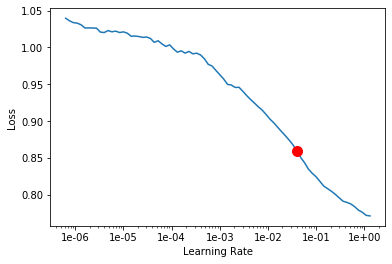

In [51]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [59]:
learner.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.447273,0.443491,0.454722,00:22
1,0.450938,0.443417,0.455198,00:22
2,0.444628,0.443859,0.455056,00:22
3,0.453435,0.443710,0.454840,00:22
4,0.457088,0.443557,0.455590,00:22
5,0.458336,0.443447,0.453996,00:22
6,0.444035,0.443684,0.454220,00:22
7,0.444072,0.443422,0.454940,00:22
8,0.449789,0.443490,0.454080,00:21
9,0.442346,0.443590,0.454390,00:22


## MultiKernel Conv

In [37]:
import pre
from metrics import Pearson

def get_data(data_dir):
    cgm, meals = pre.get_dfs(data_dir)
    mean, std = pre.norm_stats['GlucoseValue']
    cgm['GlucoseValue'] = cgm['GlucoseValue'] - mean / std
    cgm, y = pre.build_cgm(cgm)
    return cgm, meals, y


In [38]:
train_cgm, _, train_y = get_data(train)
val_cgm, _, val_y = get_data(val)

/home/labs/waic/omrik/DNN-Challenge/pre.py:73: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  X = X.loc[y.index].dropna(how='any', axis=0)


In [39]:
train_ds = GlucoseData(train_cgm, train_y)
val_ds = GlucoseData(val_cgm, val_y)
data = DataBunch.create(train_ds, val_ds, bs=512)
data

DataBunch;

Train: <__main__.GlucoseData object at 0x7fbb65b2c7f0>;

Valid: <__main__.GlucoseData object at 0x7fbb64b61278>;

Test: None

In [40]:
class MultiKernelConv(Module):
    def __init__(self, fi, fn, stride=1):
        super().__init__()
        self.bn = nn.BatchNorm1d(fn)
        fn = fn // 4
        p = [1, 2, 3, 4]
        self.conv3 = nn.Conv1d(fi, fn, 3, stride=stride, padding=p[0])
        self.conv5 = nn.Conv1d(fi, fn, 5, stride=stride, padding=p[1])
        self.conv7 = nn.Conv1d(fi, fn, 7, stride=stride, padding=p[2])
        self.conv9 = nn.Conv1d(fi, fn, 9, stride=stride, padding=p[3])
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x3 = self.conv3(x)
        x5 = self.conv5(x)
        x7 = self.conv7(x)
        x9 = self.conv9(x)
        x = torch.cat((x3, x5, x7, x9), dim=1)
        x = self.bn(x)
        x = self.relu(x)
        return x
        
def conv1d_layer(ni, nf, stride=1):
    return nn.Sequential(
        nn.Conv1d(ni, nf, kernel_size=3, padding=1, stride=stride),
        nn.BatchNorm1d(nf),
        nn.ReLU(inplace=True)
    )

In [41]:
model = nn.Sequential(
    MultiKernelConv(1, 4, stride=2),
    MultiKernelConv(4, 16, stride=2),
    MultiKernelConv(16, 32, stride=2),
    conv1d_layer(32, 64, stride=2),
    Flatten(),
    nn.Linear(256, 8)
)

In [42]:
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=[mean_absolute_error, Pearson(val_y)])

epoch,train_loss,valid_loss,mean_absolute_error,pearson,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-04
Min loss divided by 10: 7.59E-02


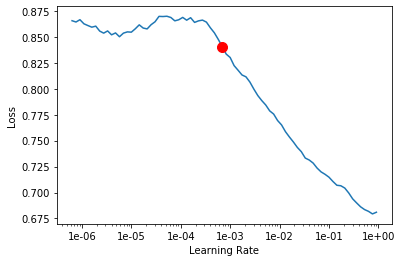

In [43]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [44]:
learner.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,pearson,time
0,0.482386,0.465048,0.463674,0.577114,00:28
1,0.474502,0.467543,0.459388,0.577206,00:27
2,0.463149,0.473636,0.451470,0.579327,00:28
3,0.455897,0.457504,0.452324,0.593853,00:27
4,0.459548,0.451210,0.456747,0.586610,00:28
5,0.461579,0.449028,0.452709,0.595618,00:28
6,0.453827,0.447915,0.451703,0.598175,00:28
7,0.453604,0.444402,0.457779,0.599260,00:28
8,0.446267,0.442846,0.454035,0.597534,00:28
9,0.436926,0.443053,0.453778,0.598494,00:28


In [47]:
class AddNoise(Callback):
    
    def __init__(self, std):
        self.std = std
        
    def on_batch_begin(self, last_input, last_target, train, **kwargs):
        if not train:
            return
        
        noise = torch.normal(0, self.std, last_input.shape).to(last_input.device)
        return {'last_input': last_input + noise}


epoch,train_loss,valid_loss,mean_absolute_error,pearson,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.74E-04


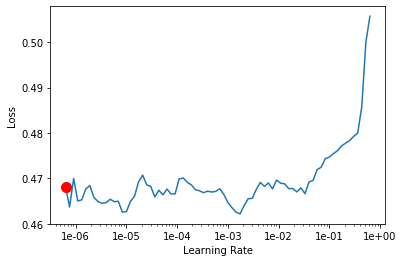

In [48]:
noise = AddNoise(.1)
metrics = [mean_absolute_error, Pearson(val_y)]
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=metrics, callbacks=noise)
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [49]:
learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,pearson,time
0,0.458091,0.449734,0.462154,0.589573,00:28
1,0.456447,0.449963,0.459692,0.590247,00:28
2,0.460482,0.449807,0.460598,0.589863,00:30
3,0.450364,0.451031,0.462497,0.591327,00:37
4,0.461498,0.450830,0.461940,0.587719,00:48
5,0.455523,0.450750,0.461697,0.589615,00:46
6,0.459233,0.451335,0.463130,0.588101,00:40
7,0.454050,0.449913,0.460957,0.590528,00:28
8,0.459548,0.450216,0.461740,0.589327,00:28
9,0.460483,0.450306,0.462277,0.589178,00:28


epoch,train_loss,valid_loss,mean_absolute_error,pearson,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06
Min loss divided by 10: 6.31E-08


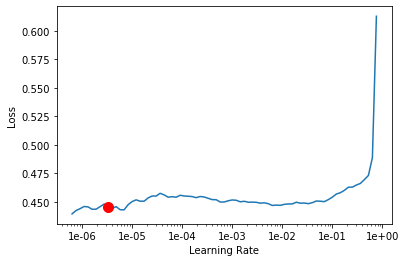

In [50]:
noise = AddNoise(.05)
metrics = [mean_absolute_error, Pearson(val_y)]
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=metrics, callbacks=noise)
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [51]:
learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,pearson,time
0,0.446351,0.447456,0.457777,0.592228,00:28
1,0.455486,0.446379,0.457386,0.595188,00:28
2,0.451190,0.447711,0.457919,0.594495,00:28
3,0.450152,0.445931,0.456943,0.594617,00:28
4,0.443086,0.445576,0.455468,0.596879,00:28
5,0.451000,0.446177,0.456772,0.594634,00:28
6,0.448988,0.445985,0.456037,0.594553,00:28
7,0.441541,0.446079,0.455792,0.594638,00:28
8,0.445804,0.445858,0.456863,0.594718,00:28
9,0.443672,0.445914,0.456951,0.594867,00:28


epoch,train_loss,valid_loss,mean_absolute_error,pearson,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 3.02E-06


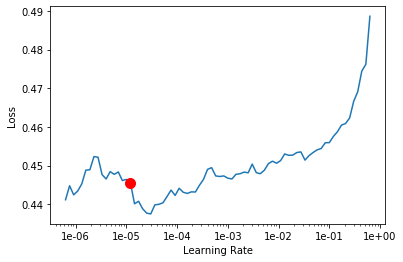

In [53]:
noise = AddNoise(.01)
metrics = [mean_absolute_error, Pearson(val_y)]
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=metrics, callbacks=noise)
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [54]:
learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,pearson,time
0,0.442036,0.445410,0.455366,0.597138,00:28
1,0.444194,0.445141,0.454567,0.597392,00:28
2,0.446364,0.445144,0.455895,0.593807,00:28
3,0.441578,0.445528,0.455836,0.593726,00:28
4,0.442851,0.446042,0.452002,0.597070,00:28
5,0.440492,0.446604,0.454255,0.597561,00:28
6,0.441621,0.444959,0.454468,0.596356,00:28
7,0.435024,0.444898,0.454379,0.596703,00:28
8,0.441412,0.444594,0.454729,0.597109,00:28
9,0.442522,0.444958,0.455699,0.596535,00:28
